<a href="https://colab.research.google.com/github/Ashutosh-Singh-Thakur/OIBSIB/blob/main/TASK-1/Iris-Flower-Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Flower Classification

## Table of Contents
1. [Load and Visualize Iris Dataset](#load-and-visualize-iris-dataset)
2. [Visualize Sepal and Petal Characteristics](#visualize-sepal-and-petal-characteristics)
3. [Check Feature Correlation](#check-feature-correlation)
4. [Preprocess Data and Train Models](#preprocess-data-and-train-models)
5. [Train K-Nearest Neighbors (KNN) Model](#train-k-nearest-neighbors-knn-model)
6. [Train Logistic Regression Model](#train-logistic-regression-model)
7. [Confusion Matrix](#confusion-matrix)
8. [Example Prediction](#example-prediction)
9. [Save the Model](#save-the-model)

In [31]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, confusion_matrix
import pickle

### Load and Visualize Iris Dataset

In [32]:
# Load the Iris dataset
iris = load_iris()

# Create a DataFrame from the dataset
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Species'] = iris.target_names[iris.target]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


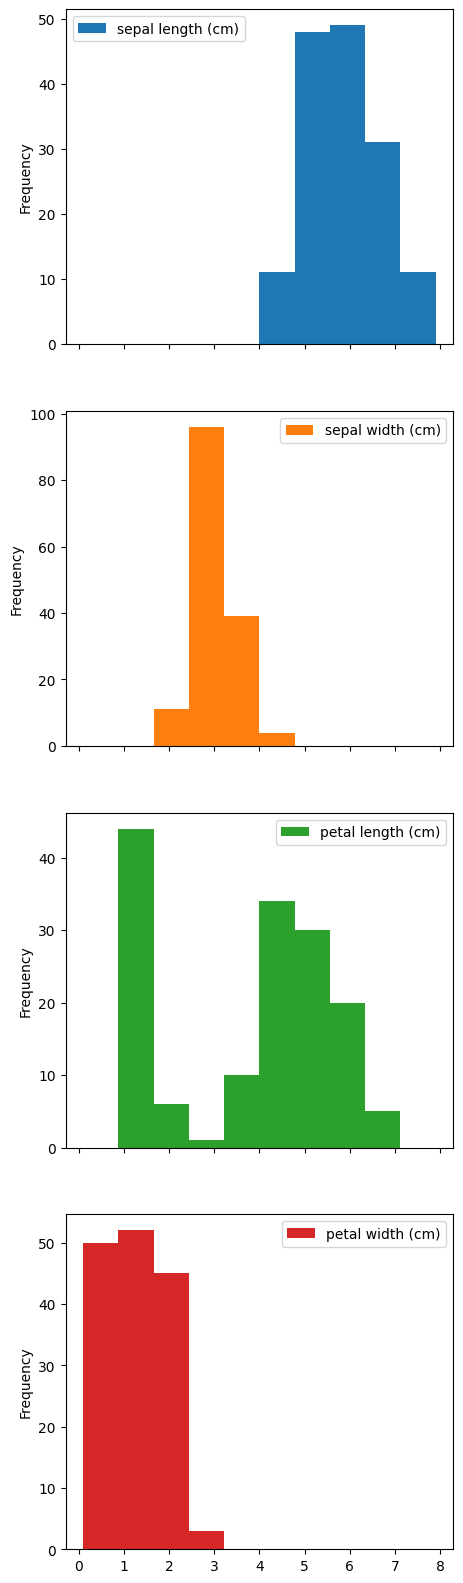

In [33]:
df.plot(kind = 'hist', subplots = True, figsize = (5,20))
plt.show()

### Visualize Sepal and Petal Characteristics

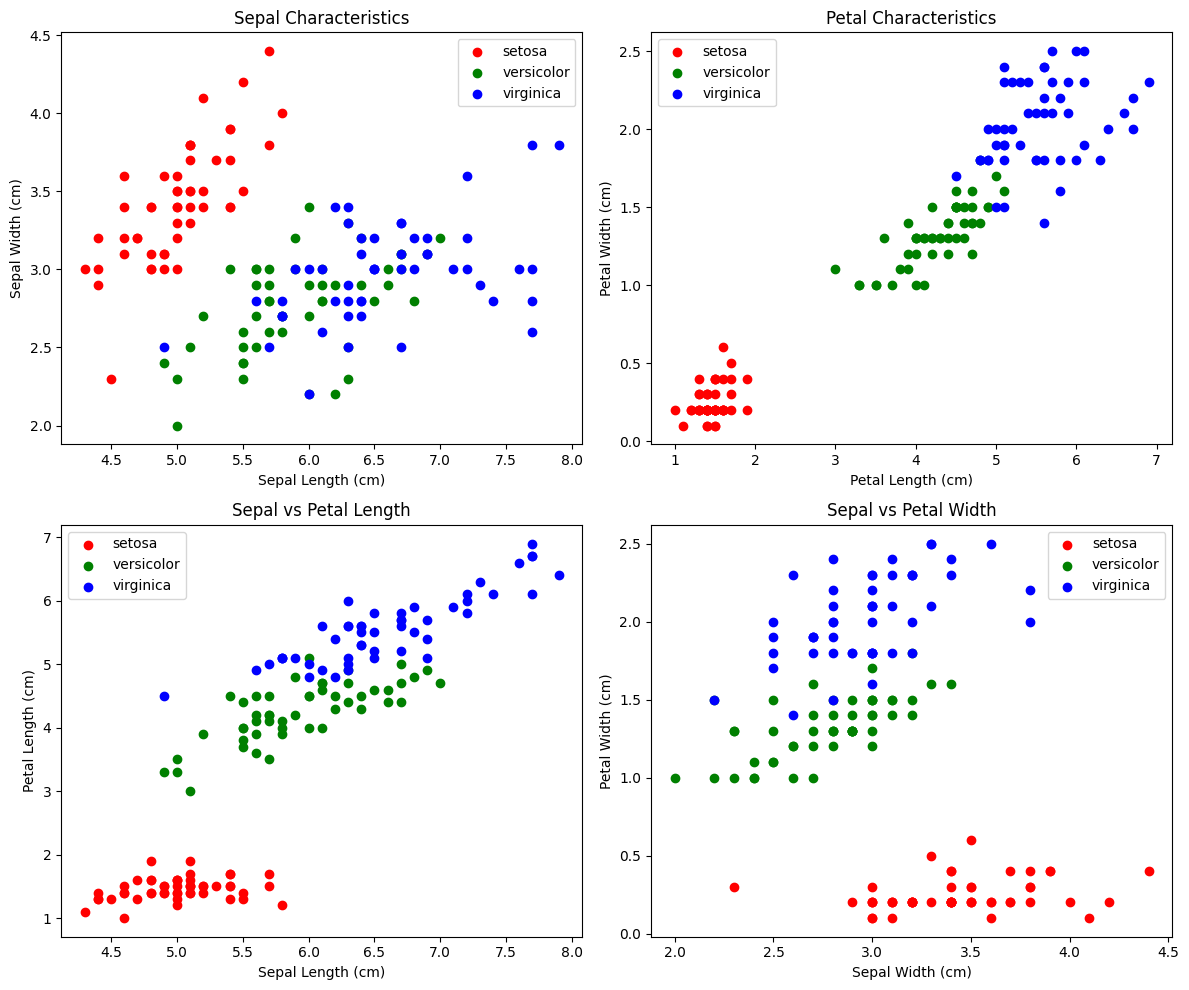

In [34]:
# Visualize sepal and petal characteristics using subplots
colors = ['red', 'green', 'blue']
species = ['setosa', 'versicolor', 'virginica']

# Create a 2x2 subplot grid for all scatter plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot Sepal Data
for i in range(3):
    subset_sepal = df[df['Species'] == species[i]]
    axes[0, 0].scatter(subset_sepal['sepal length (cm)'], subset_sepal['sepal width (cm)'], c=colors[i], label=species[i])

axes[0, 0].set_title('Sepal Characteristics')
axes[0, 0].set_xlabel('Sepal Length (cm)')
axes[0, 0].set_ylabel('Sepal Width (cm)')
axes[0, 0].legend()

# Plot Petal Data
for i in range(3):
    subset_petal = df[df['Species'] == species[i]]
    axes[0, 1].scatter(subset_petal['petal length (cm)'], subset_petal['petal width (cm)'], c=colors[i], label=species[i])

axes[0, 1].set_title('Petal Characteristics')
axes[0, 1].set_xlabel('Petal Length (cm)')
axes[0, 1].set_ylabel('Petal Width (cm)')
axes[0, 1].legend()

# Plot Sepal vs Petal Length
for i in range(3):
    subset_sepal = df[df['Species'] == species[i]]
    axes[1, 0].scatter(subset_sepal['sepal length (cm)'], subset_sepal['petal length (cm)'], c=colors[i], label=species[i])

axes[1, 0].set_title('Sepal vs Petal Length')
axes[1, 0].set_xlabel('Sepal Length (cm)')
axes[1, 0].set_ylabel('Petal Length (cm)')
axes[1, 0].legend()

# Plot Sepal vs Petal Width
for i in range(3):
    subset_sepal = df[df['Species'] == species[i]]
    axes[1, 1].scatter(subset_sepal['sepal width (cm)'], subset_sepal['petal width (cm)'], c=colors[i], label=species[i])

axes[1, 1].set_title('Sepal vs Petal Width')
axes[1, 1].set_xlabel('Sepal Width (cm)')
axes[1, 1].set_ylabel('Petal Width (cm)')
axes[1, 1].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### Check Feature Correlation

In [35]:
# Check correlation between features
df.corr()

<ipython-input-35-94f8dac257ea>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


### Preprocess Data and Train Models

In [36]:
# Preprocess the data and train models
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

# Separating inputs & outputs
x = df.drop(columns=['Species'])
y = df['Species']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [37]:
column_trans = make_column_transformer((OneHotEncoder(sparse=False), []),remainder='passthrough')
scaler = StandardScaler()

### Train K-Nearest Neighbors (KNN) Model

In [38]:
# Build and train the K-Nearest Neighbors (KNN) model
knn = KNeighborsClassifier()
knn_pipe = make_pipeline(column_trans, scaler, knn)
knn_pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [])])),
                ('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

### Train Logistic Regression Model

In [39]:
# Build and train the Logistic Regression model
lr = LogisticRegression()
lr_pipe = make_pipeline(column_trans, scaler, lr)
lr_pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [])])),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [40]:
y_pred_lr = lr_pipe.predict(x_test)
r2_score(y_test, y_pred_lr)

0.9496644295302014

In [41]:
y_pred_knn = knn_pipe.predict(x_test)
r2_score(y_test, y_pred_knn)

1.0

### Confusion Matrix

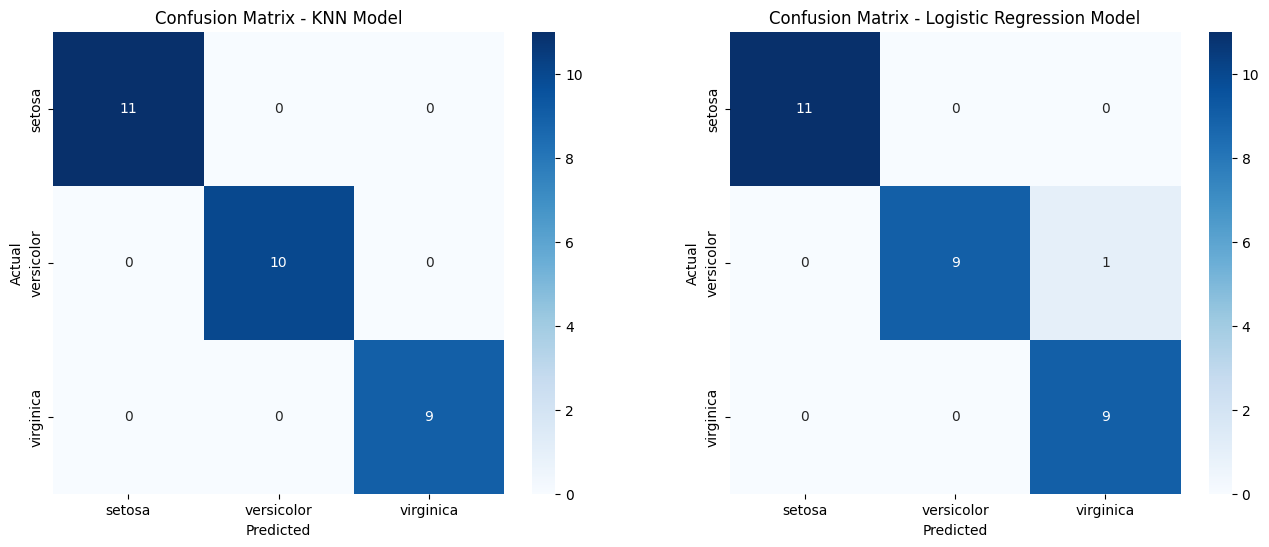

In [42]:
# Confusion matrix for K-Nearest Neighbors (KNN) model
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Confusion matrix for Logistic Regression model
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plot both confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# K-Nearest Neighbors (KNN) model
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names, ax=axes[0])
axes[0].set_title('Confusion Matrix - KNN Model')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Logistic Regression model
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names, ax=axes[1])
axes[1].set_title('Confusion Matrix - Logistic Regression Model')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.show()

### Example Prediction

In [43]:
# Example prediction using the Logistic Regression model
lr_pipe.predict([[1.2, 1.5, 1.6, 1.2]])

array([0])

In [44]:
# Example prediction using the K-Nearest Neighbors (KNN) model
knn_pipe.predict([[1.2, 1.5, 1.6, 1.2]])

array([1])

### Save the Model

In [46]:
# Save the trained model to a file
pickle.dump(knn_pipe, open('iris_flower.pkl', 'wb'))

## Author
Ashutosh Singh Thakur